In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#define normalised light curve function for each passband 

In [4]:
from core import *

def create_light_curve(o,s,center,width):
    lc = array([(o[i,:,center-width:center+width]-s[i,:,newaxis]).mean(1) for i in range(o.shape[0])])
    return lc/median(lc)

gain = pf.getval(l_obj[0], 'gain')
b1 = np.load(join(reddir,'bias_y.npz'))['ccd1_denoised']
b2 = np.load(join(reddir,'bias_y.npz'))['ccd2_denoised']

f1 = np.load(join(reddir,'masterflats.npz'))['flat_ccd1'] - b1[:,newaxis]
f2 = np.load(join(reddir,'masterflats.npz'))['flat_ccd2'] - b2[:,newaxis]

# Create the comparison light curve

In [5]:
#correct data for ccd bias

In [6]:
dco1 = gain*(pf.getdata('data/cube_o1.fits').astype(np.float64) - b1[newaxis,:,newaxis])
dcs1 = gain*(pf.getdata('data/cube_s1.fits').astype(np.float64) - b1[newaxis,:,newaxis])

In [24]:
f1o=f1[:,245:350]
f1o = array([f1o,]*651)
dco1=dco1/f1o
print f1o.shape

(651, 2051, 105)


In [9]:
#f1s=f1[:,370:450]
#f1s = array([f1s,]*651)
#dcs1=dcs1/f1s

In [8]:
sky1  = dcs1.mean(-1)
flux1 = create_light_curve(dco1,sky1,center=40,width=25)

In [9]:
bmsk = ones(flux1.shape[0],np.bool)
bmsk[317:320] = 0

In [10]:
flux1 = flux1[bmsk]

In [13]:
pf.writeto(join(reddir,'spectra_1.fits'), flux1, clobber=True)

/home/mert3269/Library/Python/2.7/lib/python/site-packages/pyfits/file.py:339: UserWarning: Overwriting existing file '/home/mert3269/soft/Parviainen-WASP-80b-Osiris/data/spectra_1.fits'.
  warnings.warn("Overwriting existing file %r." % self.name)


## Create the target light curve

In [14]:
#correct data for ccd bias

In [11]:
dco2 = gain*(pf.getdata('data/cube_o2.fits').astype(np.float64) - b2[newaxis,:,newaxis])
dcs2 = gain*(pf.getdata('data/cube_s2.fits').astype(np.float64) - b2[newaxis,:,newaxis])

In [16]:
#f2o=f2[:,840:895]
#f2o = array([f2o,]*651)
#dco2=dco2/f2o

In [17]:
#f2s=f2[:,770:810]
#f2s= array([f2s,]*651)
#dcs2=dcs2/f2s

In [12]:
sky2 = dcs2.mean(-1)
flux2 = create_light_curve(dco2,sky2,center=24,width=15)
flux2 = flux2[bmsk]

In [19]:
pf.writeto(join(reddir,'spectra_2.fits'), flux2, clobber=True)

/home/mert3269/Library/Python/2.7/lib/python/site-packages/pyfits/file.py:339: UserWarning: Overwriting existing file '/home/mert3269/soft/Parviainen-WASP-80b-Osiris/data/spectra_2.fits'.
  warnings.warn("Overwriting existing file %r." % self.name)


In [20]:
#light curves for comparision and target stars - mean of broadband light

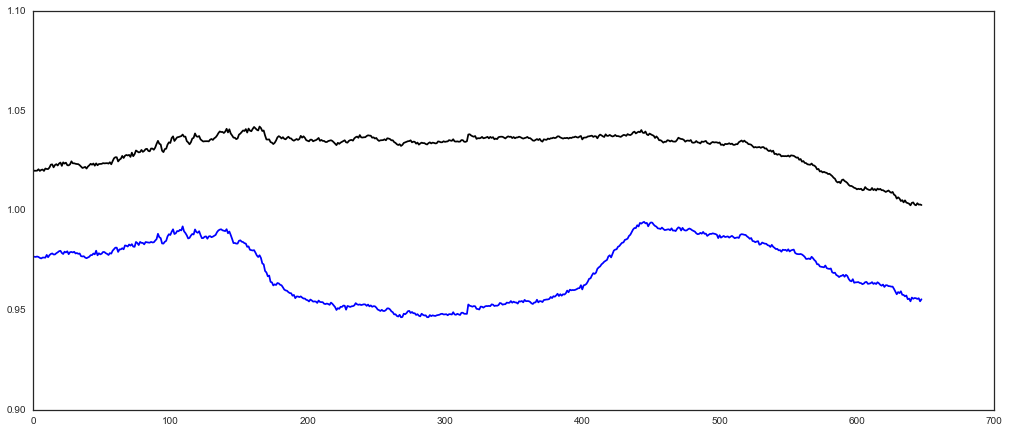

In [14]:
fig,ax = subplots(1,1,figsize=(14,6))
plot(flux1.mean(1)+0.05,'k')
plot(flux2.mean(1),'b')
ylim(0.9,1.1)
fig.tight_layout()

In [22]:
#?
#average standard deviation for different wavelengths over total time 

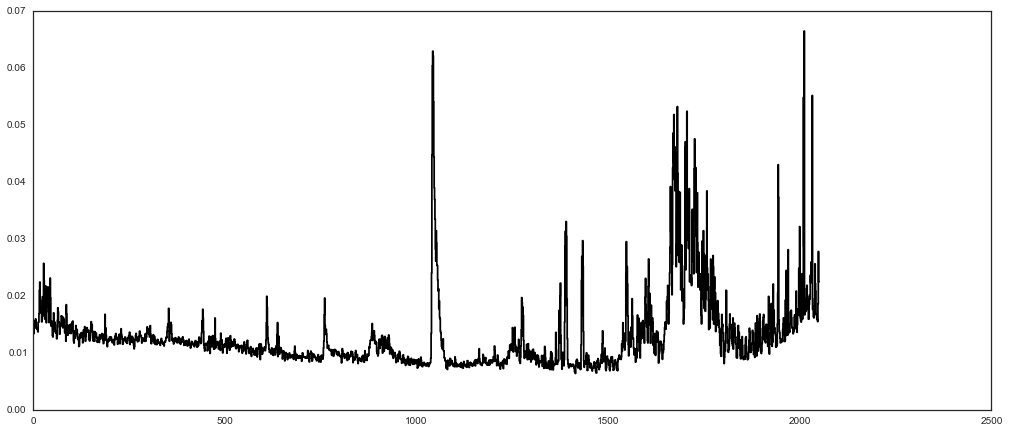

In [23]:
fig,ax = subplots(1,1,figsize=(14,6))
#plot(flux1.mean(0), 'k', drawstyle='steps-mid')
plot(flux1.std(0)/flux1.mean(0), 'k', drawstyle='steps-mid')
#xlim(1020,1100)
fig.tight_layout()

In [24]:
#Target light curve / comaparison light curve

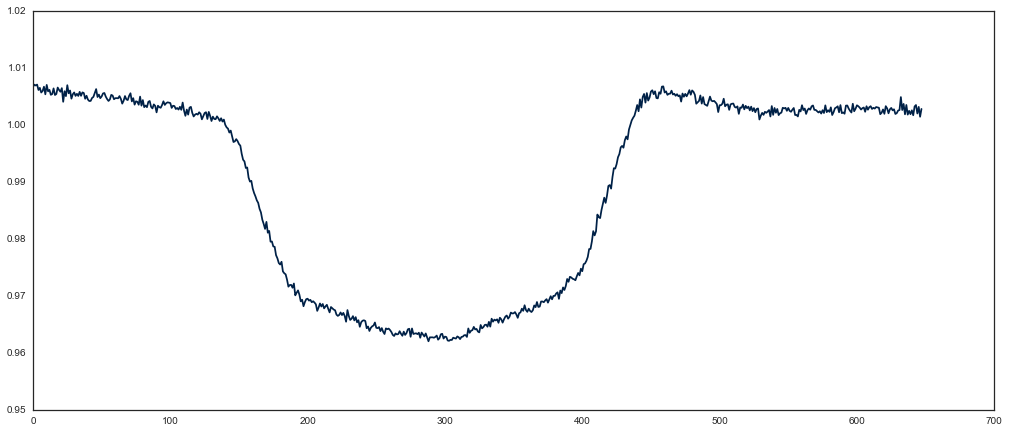

In [22]:
fig,ax = subplots(1,1,figsize=(14,6))
plot(flux2.mean(1)/flux1.mean(1)) #spike appears because we take mean of the ratios rather than mean of each flux
ylim(0.95,1.02)
fig.tight_layout()

In [26]:
#Target light curve / comaparison light curve  for two wavelength bands

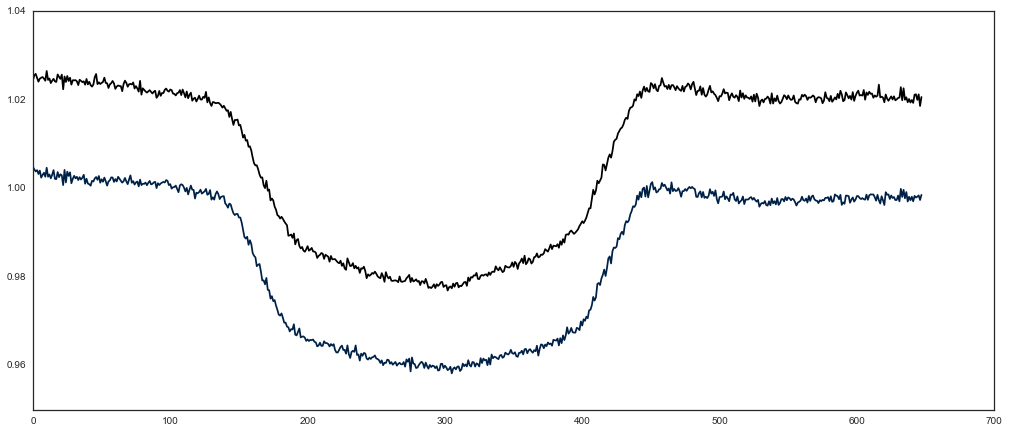

In [37]:
fig,ax = subplots(1,1,figsize=(14,6))
plot(flux2[:,500:700].mean(1)/flux1[:,500:700].mean(1)/1.03, 'k')
plot(flux2[:,1100:1300].mean(1)/flux1[:,1100:1300].mean(1)/1.01)
ylim(0.95,1.04)
fig.tight_layout()